# **Titanic Data Set**<br>
Data from the Titanic includes statistics on the passengers' chances of survival. There is no information on the crew member in this data. It comprises 891 observations and 12 columns.<br>

**Problam statement**<br>
We have 12 columns including one Target column (Survived). we have to train our machine to learn the pattern basis the available data and predict furture data.it is binery classification problem. we will use classification model to trained it.<br>

**Features information**<br>

Passengerid<br>
Pclass Passenger    =     Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
survival Survival   =     (0 = No; 1 = Yes)<br>
name<br> 
sex<br>
age <br>
sibsp                =    Number of Siblings/Spouses Aboard<br>
parch                =    Number of Parents/Children Aboard<br>
ticket               =    Ticket Number<br>
fare Passenger Fare  =   (British pound)<br>
cabin <br>
embarked             =   Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observation**<br>
It contains total 891 observations, 11 predictors and 1 target variable. 
Dataset consists of 5 integer columns, 5 object columns and 2 float.<br> 
We can see that two columns have missing values:"Age" and "Cabin"<br>

In [4]:
titanic.shape

(891, 12)

# Imputing Missing Values

In [5]:
missing_val = {}
for i in titanic.columns:
    if titanic[i].isnull().sum() >0:
        missing_val[i] = titanic[i].isnull().sum()/len(titanic)*100
print(missing_val)   

{'Age': 19.865319865319865, 'Cabin': 77.10437710437711, 'Embarked': 0.22446689113355783}


In [6]:
def missing_Val(col):
    Age = col[0]
    Sex = col[1]
    
    if pd.isnull(Age):
        if Sex =="male":
            return 30.726645
        elif Sex =="female":
            return 27.915709
    else:
        return Age

In [7]:
titanic["Age"] = titanic[["Age","Sex"]].apply(missing_Val,axis = 1)

In [8]:
def impute_fare(col):
    Fare = col[0]
    Pclass = col[1]
    
    if pd.isnull(Fare):
        if Pclass ==1:
            return 84.154687
        elif Pclass ==2:
            return 20.662183
        else:
            return 13.675550
    else:
        return Fare

In [9]:
titanic["Fare"] = titanic["Fare"].replace(0,np.nan) 
titanic["Fare"] = titanic[["Fare","Pclass"]].apply(impute_fare, axis = 1)

In [10]:
titanic["Embarked"] =titanic["Embarked"].fillna("S") 

In [11]:
missing_val = {}
for i in titanic.columns:
    if titanic[i].isnull().sum() >0:
        missing_val[i] = titanic[i].isnull().sum()/len(titanic)*100
print(missing_val)

{'Cabin': 77.10437710437711}


**Observation**<br>
When performing a missing value analysis, we discovered three columns had missing data. 1 age where 20% of the data is missing. 2. The cabin column has a 77% missing value, many values, and the third column, embarked, only includes two observatories.<br/> 
Given that there is a variation in ages between men and women, age is assumed based on the sex columns and embarked with a mean value because it is an object column.<br/> 
We also saw that the minimal fare value, which is 0, is not a genuine one, so we had to replace it with nan for imputation and make the fare value pclass-wise. It is advisable to eliminate the cabin column because it has several missing values.

In [12]:
#SibSp stands for siblings,spouse and Parch stands for Parents,child we will create a new column by adding SibSp and Parch
# and drop their indivisual variable 
titanic['along'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [15]:
#removing cabin,ticket,name and passengerId columns. Cabin is removed as it has more thn 70% of missing values
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,along
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [16]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
along       0
dtype: int64

In [17]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
titanic.Embarked.mode()

0    S
dtype: object

In [19]:
#filling Nan value with mode which is "S"
titanic["Embarked"].fillna("S", inplace=True)

In [20]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

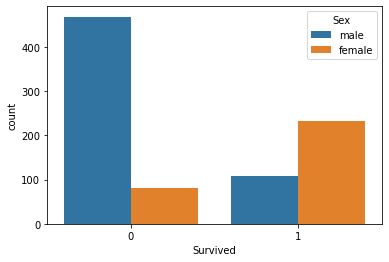

In [22]:
sns.countplot(x='Survived',hue='Sex',data=titanic)
#most of the male have not survived , and most of the female have survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

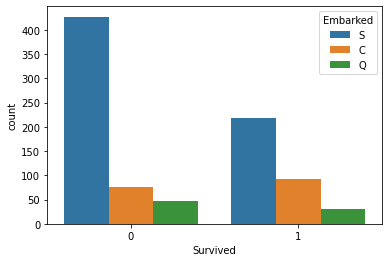

In [23]:
sns.countplot(x=titanic['Survived'],hue=titanic['Embarked'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

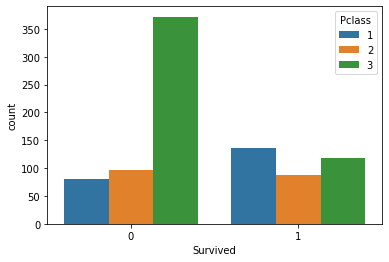

In [24]:
sns.countplot(x='Survived',hue="Pclass",data=titanic)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked']=le.fit_transform(titanic['Embarked'])

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int32  
 6   along     891 non-null    int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [28]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [29]:
titanic.Age = imp.fit_transform(titanic['Age'].values.reshape(-1,1))[:,0]
titanic.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      30.726645
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     30.726645
18     31.000000
19     27.915709
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     30.726645
27     19.000000
28     27.915709
29     30.726645
30     40.000000
31     27.915709
32     27.915709
33     66.000000
34     28.000000
35     42.000000
36     30.726645
37     21.000000
38     18.000000
39     14.000000
40     40.000000
41     27.000000
42     30.726645
43      3.000000
44     19.000000
45     30.726645
46     30.726645
47     27.915709
48     30.726645
49     18.000000
50      7.000000
51     21.000000
52     49.000000
53     29.000000
54     65.000000
55     30.726645
56     21.000000
57     28.500000
58      5.0000

In [30]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
along       0
dtype: int64

In [31]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,along
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [32]:
titanic.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,along
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.736034,32.876990,1.536476,0.904602
std,0.486592,0.836071,0.477990,13.014897,49.690114,0.791503,1.613459
min,0.000000,1.000000,0.000000,0.420000,4.012500,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.925000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,30.000000,14.500000,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.275000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,10.000000


In [33]:
from scipy.stats import zscore

In [34]:
z = np.abs(zscore(titanic))
z

,Survived,Pclass,Sex,Age,Fare,Embarked,along
0,0.789272,0.827377,0.737695,0.594732,0.516026,0.585954,0.059160
1,1.266990,1.566107,1.355574,0.635319,0.773351,1.942303,0.059160
2,1.266990,0.827377,1.355574,0.287220,0.502434,0.585954,0.560975
3,1.266990,1.566107,1.355574,0.404684,0.407211,0.585954,0.059160
4,0.789272,0.827377,0.737695,0.404684,0.499917,0.585954,0.560975
5,0.789272,0.827377,0.737695,0.076156,0.491695,0.678175,0.560975
6,0.789272,1.566107,0.737695,1.865370,0.382293,0.585954,0.560975
7,0.789272,0.827377,0.737695,2.132296,0.237645,0.585954,1.919564
8,1.266990,0.827377,1.355574,0.210341,0.437832,0.585954,0.679295
9,1.266990,0.369365,1.355574,1.209758,0.056506,1.942303,0.059160


In [35]:
threshold = 3
print(np.where(z>3))

(array([ 13,  25,  27,  59,  68,  71,  88,  96, 116, 118, 119, 159, 180,
       182, 201, 233, 258, 261, 299, 311, 324, 341, 377, 380, 386, 438,
       480, 493, 527, 541, 542, 557, 610, 630, 672, 678, 679, 683, 689,
       700, 716, 730, 737, 742, 745, 779, 792, 813, 846, 850, 851, 863],
      dtype=int64), array([6, 6, 4, 6, 6, 6, 4, 3, 3, 4, 6, 6, 6, 6, 6, 6, 4, 6, 4, 4, 6, 4,
       4, 4, 6, 4, 6, 3, 4, 6, 6, 4, 6, 3, 3, 6, 4, 6, 4, 4, 4, 4, 4, 4,
       3, 4, 6, 6, 6, 6, 3, 6], dtype=int64))


In [36]:
titanic_new =titanic[(z<3).all(axis=1)]
titanic_new.shape

(839, 7)

In [37]:
collist=titanic_new.columns.values
collist

array(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'along'],
      dtype=object)

In [38]:
collist=titanic_new.columns.values
ncol=12
nrows = 10

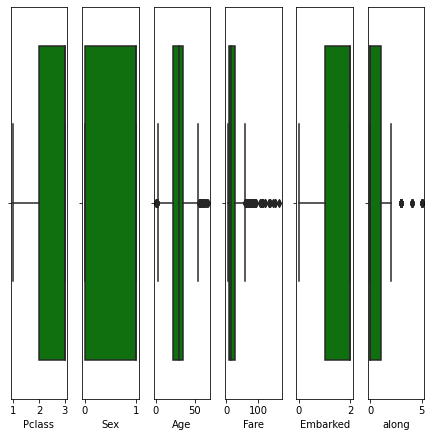

In [39]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(titanic_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [40]:
titanic_new_cor = titanic_new.corr()
titanic_new_cor

,Survived,Pclass,Sex,Age,Fare,Embarked,along
Survived,1.000000,-0.329653,-0.550216,-0.085965,0.303089,-0.156654,0.106776
Pclass,-0.329653,1.000000,0.136264,-0.328782,-0.706342,0.120962,-0.009415
Sex,-0.550216,0.136264,1.000000,0.087641,-0.220281,0.114244,-0.237568
Age,-0.085965,-0.328782,0.087641,1.000000,0.146476,-0.001422,-0.264133
Fare,0.303089,-0.706342,-0.220281,0.146476,1.000000,-0.173975,0.261800
Embarked,-0.156654,0.120962,0.114244,-0.001422,-0.173975,1.000000,-0.003651
along,0.106776,-0.009415,-0.237568,-0.264133,0.261800,-0.003651,1.000000


<AxesSubplot:>

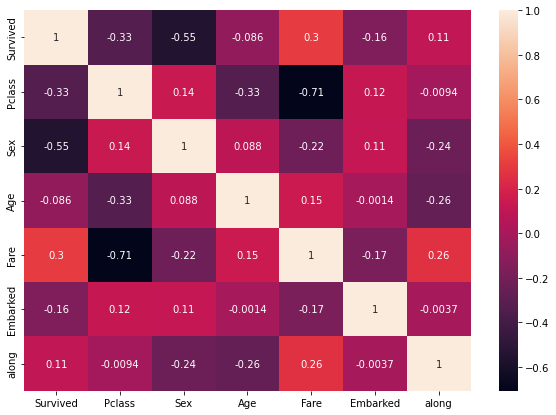

In [41]:
plt.subplots(figsize=(10,7))
sns.heatmap(titanic_new_cor,annot=True,)

In [42]:
from sklearn.preprocessing import power_transform

In [43]:
X = titanic_new.drop('Survived',axis=1)
X.head()

,Pclass,Sex,Age,Fare,Embarked,along
0,3,1,22.0,7.2500,2,1
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,0
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0


In [44]:
y = titanic_new['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 0.82148036,  0.72488244, -0.62023694, -0.65529021,  0.58347344,
         0.26944856],
       [-1.60963788, -1.37953405,  0.67560774,  1.50548687, -1.96618392,
         0.26944856],
       [ 0.82148036, -1.37953405, -0.29627577, -0.63251262,  0.58347344,
        -0.61709003],
       ...,
       [ 0.82148036, -1.37953405, -0.14112194, -0.10862795,  0.58347344,
         2.04252574],
       [-1.60963788,  0.72488244, -0.29627577,  0.11239908, -1.96618392,
        -0.61709003],
       [ 0.82148036,  0.72488244,  0.18966599, -0.63841792, -0.69135524,
        -0.61709003]])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2,random_state = 42)

In [49]:
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (671, 6)
shape of X_test: (168, 6)
shape of y_train: (671,)
shape of y_test: (168,)


In [50]:
#preparing a logistic regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train,y_train)
lg_model

LogisticRegression()

In [51]:
pred = lg.predict(X_test)
print(pred)

[0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0]


In [52]:
print("Accuracy score :", accuracy_score(y_test,pred))

Accuracy score : 0.8333333333333334


In [53]:
print("confusion metrix:", confusion_matrix(y_test,pred))

confusion metrix: [[88 13]
 [15 52]]


In [54]:
print("Classification report :",classification_report(y_test,pred))

Classification report :               precision    recall  f1-score   support

           0       0.85      0.87      0.86       101
           1       0.80      0.78      0.79        67

    accuracy                           0.83       168
   macro avg       0.83      0.82      0.83       168
weighted avg       0.83      0.83      0.83       168



In [55]:
#creating a decision tree model

In [56]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc_model = dc.fit(X_train,y_train)
dc_model

DecisionTreeClassifier()

In [57]:
dc_pred = dc.predict(X_test)
dc_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [58]:
print('Accuracy score by Decision tree :', accuracy_score(y_test,dc_pred))

Accuracy score by Decision tree : 0.7440476190476191


In [59]:
#creating a SCV model

In [60]:
from sklearn.svm import SVC
svc = SVC()
SVC_model = svc.fit(X_train,y_train)
SVC_model

SVC()

In [61]:
SVC_pred = svc.predict(X_test)
SVC_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [62]:
print("Accuracy score of SVC is :", accuracy_score(y_test,SVC_pred))

Accuracy score of SVC is : 0.8511904761904762


In [64]:
#saving the model

In [ ]:
from sklearn.externals import joblib
joblib.dump(dc_pred,'Titanic.pkl')